<a href="https://colab.research.google.com/github/ShabnumBatool/Data-Science-Fundamentals/blob/main/data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**
To perform EDA, We'll use the "Tips" dataset from Seaborn—it's small, easy to understand, and contains both categorical and numerical variables. step by step process is given below:

# **Importing Libraries**

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import numpy as np


# **Loading and Inspecting the Data**

In [25]:
df = sns.load_dataset("tips")
print(df.head())
print(df.info())
print(df.describe(include="all"))


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
        total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244 

# **Handling Missing Values**

In [26]:
# Simulate missing values
df.loc[0:3, 'total_bill'] = np.nan
df.loc[5:7, 'sex'] = None

# Check missing values
print(df.isnull().sum())

# Fill numerical with median
df['total_bill'].fillna(df['total_bill'].median(), inplace=True)

# Fill categorical with mode
df['sex'].fillna(df['sex'].mode()[0], inplace=True)


total_bill    4
tip           0
sex           3
smoker        0
day           0
time          0
size          0
dtype: int64


# **Handling Outliers**

In [27]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'total_bill')
df = remove_outliers_iqr(df, 'tip')


# **Encoding Categorical Variables**

In [28]:
# Label encoding for binary categories
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])

# One-hot encoding for non-binary
df = pd.get_dummies(df, columns=['day', 'time'], drop_first=True)


# **Normalization & Standardization**

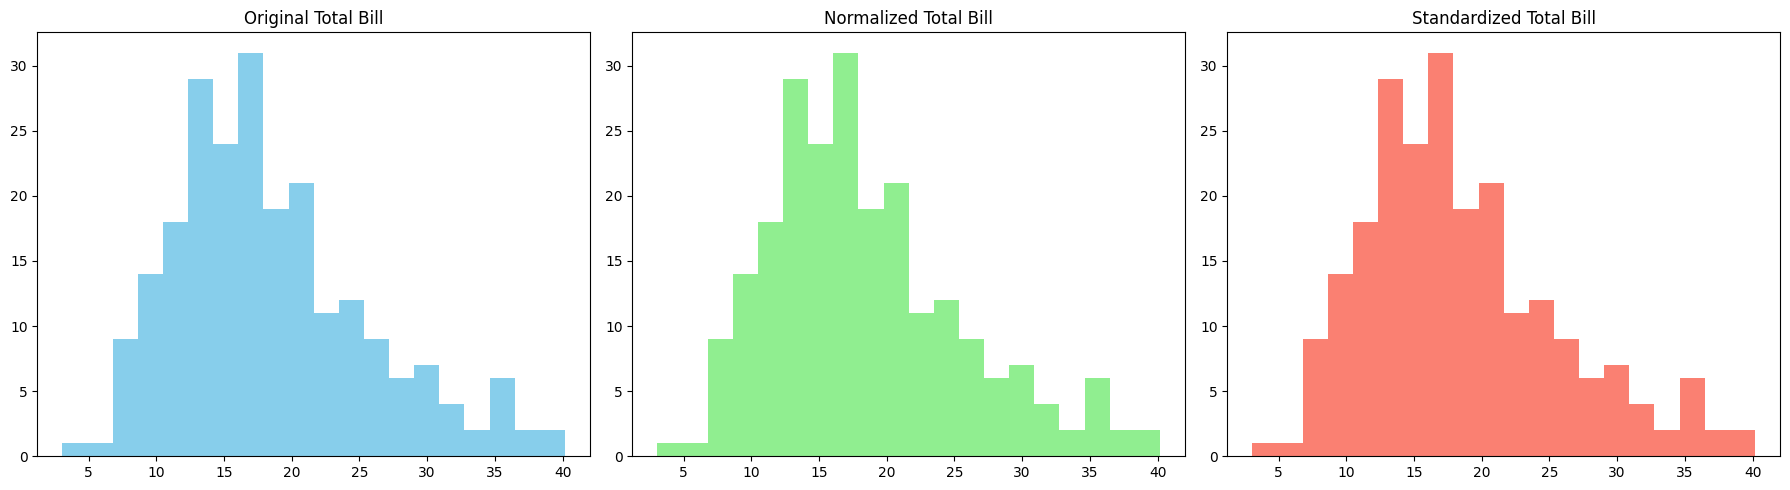

In [30]:
import matplotlib.pyplot as plt

# Create copies for normalization and standardization
df_norm = df.copy()
df_std = df.copy()

# Plot original vs normalized vs standardized for 'total_bill'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original
axes[0].hist(df['total_bill'], bins=20, color='skyblue')
axes[0].set_title("Original Total Bill")

# Normalized
axes[1].hist(df_norm['total_bill'], bins=20, color='lightgreen')
axes[1].set_title("Normalized Total Bill")

# Standardized
axes[2].hist(df_std['total_bill'], bins=20, color='salmon')
axes[2].set_title("Standardized Total Bill")

plt.tight_layout()
plt.show()


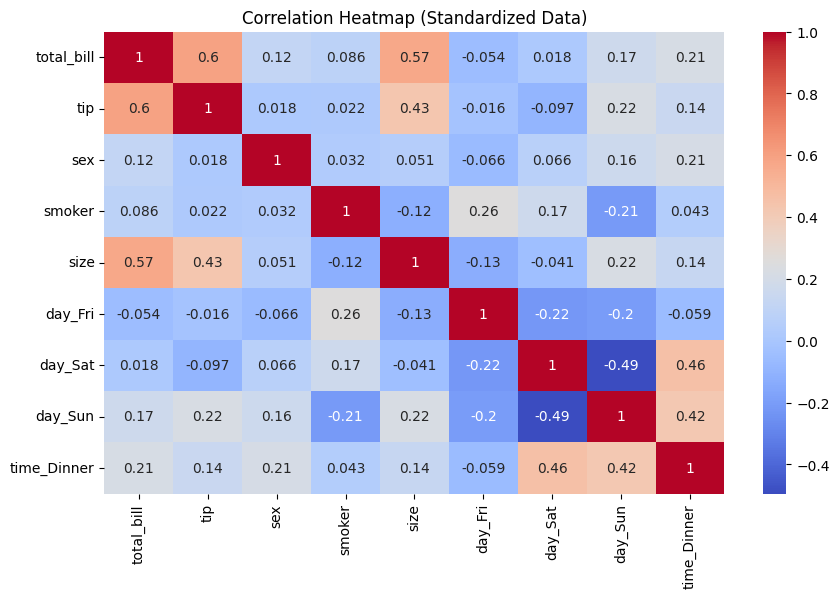

In [31]:
import seaborn as sns

# Correlation of standardized data
corr = df_std.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Standardized Data)")
plt.show()


In [32]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import numpy as np

# Load the "tips" dataset
df = sns.load_dataset("tips")

# Simulate missing values for demonstration
df.loc[0:3, 'total_bill'] = np.nan
df.loc[5:7, 'sex'] = None

# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Fill missing values
df['total_bill'].fillna(df['total_bill'].median(), inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Remove outliers in 'total_bill' and 'tip'
df = remove_outliers_iqr(df, 'total_bill')
df = remove_outliers_iqr(df, 'tip')

# Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])

# One-hot encoding for non-binary categories
df = pd.get_dummies(df, columns=['day', 'time'], drop_first=True)

# Create copies for normalization and standardization
df_norm = df.copy()
df_std = df.copy()

# Select numeric columns
num_cols = ['total_bill', 'tip', 'size']

# Normalize numeric columns
scaler_norm = MinMaxScaler()
df_norm[num_cols] = scaler_norm.fit_transform(df_norm[num_cols])

# Standardize numeric columns
scaler_std = StandardScaler()
df_std[num_cols] = scaler_std.fit_transform(df_std[num_cols])

# Show results
print("\nOriginal Data Sample:\n", df.head())
print("\nNormalized Data Sample:\n", df_norm.head())
print("\nStandardized Data Sample:\n", df_std.head())


Missing values before handling:
 total_bill    4
tip           0
sex           3
smoker        0
day           0
time          0
size          0
dtype: int64

Missing values after handling:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Original Data Sample:
    total_bill   tip  sex  smoker  size  day_Fri  day_Sat  day_Sun  time_Dinner
0      17.795  1.01    0       0     2    False    False     True         True
1      17.795  1.66    1       0     3    False    False     True         True
2      17.795  3.50    1       0     3    False    False     True         True
3      17.795  3.31    1       0     2    False    False     True         True
4      24.590  3.61    0       0     4    False    False     True         True

Normalized Data Sample:
    total_bill       tip  sex  smoker  size  day_Fri  day_Sat  day_Sun  \
0    0.396900  0.002151    0       0   0.2    False    False     True   
1    0.396900 